# Exercise 2: Customer Churn Prediction using Logistic Regression
Background:
A telecommunications company wants to predict which customers are likely to churn (cancel their service) based on their usage patterns and demographic information.
Data Description
The dataset contains the following features:

<br> Monthly charges ($)
<br> Contract length (months)
<br> Total data usage (GB)
<br> Customer service calls (count)
<br> Age of customer (years)
<br> Target variable: Churned (0 = No, 1 = Yes)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(42)
n_samples = 1000

data = {
    'monthly_charges': np.random.uniform(30, 120, n_samples),
    'contract_length': np.random.randint(1, 24, n_samples),
    'data_usage': np.random.uniform(0, 500, n_samples),
    'service_calls': np.random.poisson(2, n_samples),
    'age': np.random.normal(40, 15, n_samples)
}

# Create churn probability with more noise
z = (
    0.03 * data['monthly_charges'] -
    0.1 * data['contract_length'] +
    0.001 * data['data_usage'] +
    0.5 * data['service_calls'] -
    0.02 * data['age']
)

# Add more random noise to make it more realistic
z = z + np.random.normal(0, 2, n_samples)

# Convert to probabilities using sigmoid function
prob_churn = 1 / (1 + np.exp(-z))
data['churned'] = (np.random.random(n_samples) < prob_churn).astype(int)

df = pd.DataFrame(data)

In [ ]:
df['churned'].value_counts()

,count
churned,
1,675
0,325


Questions to answer:
<br> a. Perform exploratory data analysis to understand the relationship between features and churn
<br> b. Split the data and train a logistic regression model
<br> c. Evaluate the model using:
<br> Accuracy
<br> Precision
<br> Recall
<br> F1-score
<br> d. Create and interpret the confusion matrix
<br> e. What features are most predictive of customer churn?
<br> f. How would you handle class imbalance if present in the dataset?

Basic Statistics:
       monthly_charges  contract_length   data_usage  service_calls  \
count      1000.000000      1000.000000  1000.000000     1000.00000   
mean         74.123090        11.823000   248.323164        2.01400   
std          26.292363         6.546184   146.498222        1.43801   
min          30.416882         1.000000     0.094200        0.00000   
25%          51.237594         6.000000   116.310997        1.00000   
50%          74.712664        12.000000   250.346012        2.00000   
75%          96.988763        17.000000   375.671982        3.00000   
max         119.974591        23.000000   499.856902        9.00000   

               age      churned  
count  1000.000000  1000.000000  
mean     39.566056     0.675000  
std      14.927770     0.468609  
min     -15.631949     0.000000  
25%      29.261459     0.000000  
50%      40.203478     1.000000  
75%      49.751467     1.000000  
max      82.613296     1.000000  

Correlation with Churn:
churned    

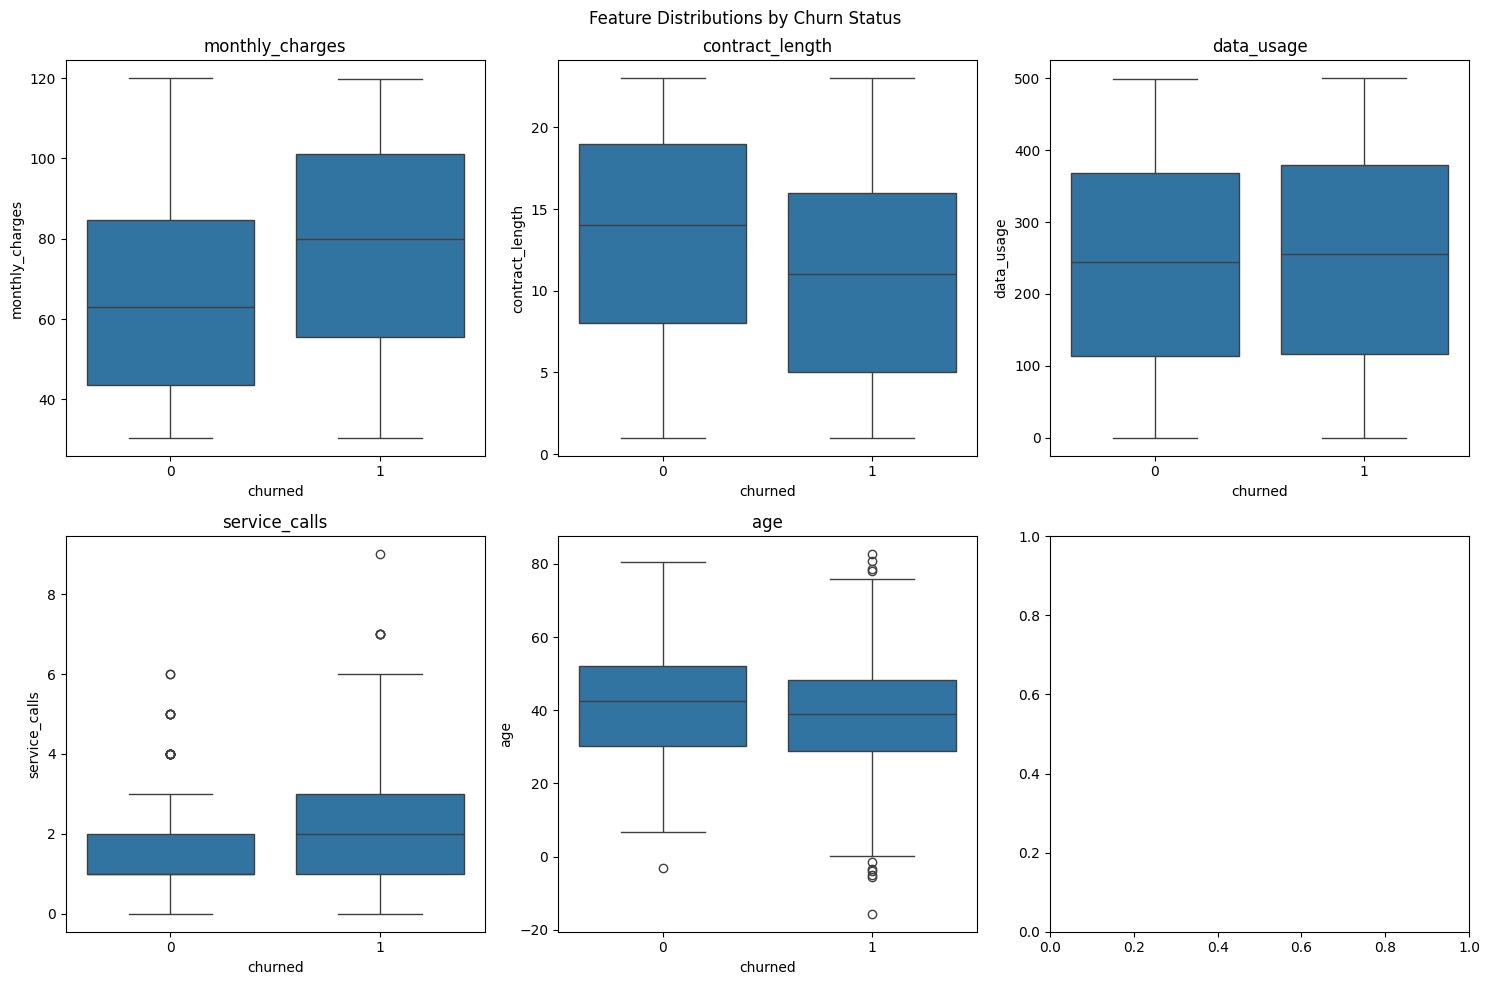

In [ ]:
#a)
# 1. Basic statistics
print("Basic Statistics:")
print(df.describe())

# 2. Correlation analysis
correlation_matrix = df.corr()
print("\nCorrelation with Churn:")
print(correlation_matrix['churned'].sort_values(ascending=False))

# 3. Feature distributions by churn status
import matplotlib.pyplot as plt
import seaborn as sns

# Create visualization for feature distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions by Churn Status')

features = ['monthly_charges', 'contract_length', 'data_usage', 'service_calls', 'age']
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x='churned', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

In [ ]:
#b) Split the data and train a logistic regression model
from sklearn.model_selection import train_test_split

# Prepare features and target
X = df[['monthly_charges', 'contract_length', 'data_usage', 'service_calls', 'age']]
y = df['churned']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
print(y_test)

521    0
737    0
740    1
660    1
411    1
      ..
468    1
935    1
428    0
7      0
155    0
Name: churned, Length: 300, dtype: int64


In [ ]:
#c) evaluate model with metrics

# Calculate all metrics
print("\nModel Performance Metrics:")
print(classification_report(y_test, y_pred))

# Detailed explanation of metrics
print("\nMetric Interpretations:")
print("Accuracy: Proportion of correct predictions (both true positives and true negatives)")
print("Precision: Proportion of true positive predictions among all positive predictions")
print("Recall: Proportion of actual positives correctly identified")
print("F1-score: Harmonic mean of precision and recall")


Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.52      0.37      0.43        95
           1       0.74      0.84      0.79       205

    accuracy                           0.69       300
   macro avg       0.63      0.61      0.61       300
weighted avg       0.67      0.69      0.68       300


Metric Interpretations:
Accuracy: Proportion of correct predictions (both true positives and true negatives)
Precision: Proportion of true positive predictions among all positive predictions
Recall: Proportion of actual positives correctly identified
F1-score: Harmonic mean of precision and recall


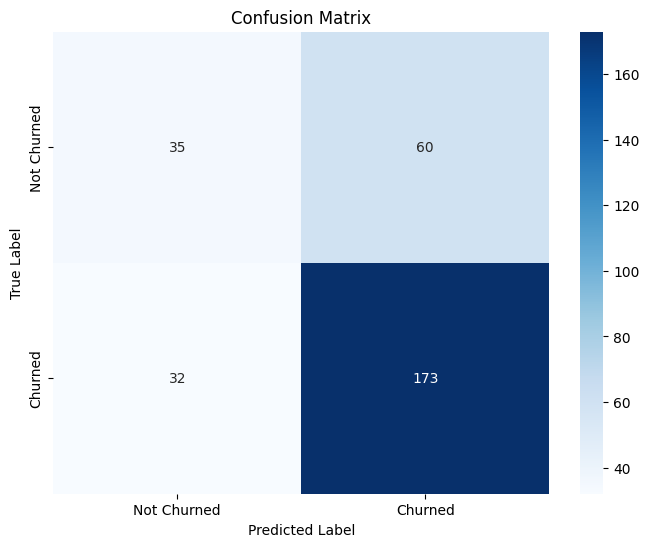


Confusion Matrix Interpretation:
True Negatives (Correctly predicted non-churn): 35
False Positives (Incorrectly predicted churn): 60
False Negatives (Incorrectly predicted non-churn): 32
True Positives (Correctly predicted churn): 173


In [ ]:
#d Create and interpret the confusion matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (Correctly predicted non-churn): {conf_matrix[0,0]}")
print(f"False Positives (Incorrectly predicted churn): {conf_matrix[0,1]}")
print(f"False Negatives (Incorrectly predicted non-churn): {conf_matrix[1,0]}")
print(f"True Positives (Correctly predicted churn): {conf_matrix[1,1]}")


Feature Importance:
           Feature  Coefficient  Abs_Coefficient
3    service_calls     0.373581         0.373581
1  contract_length    -0.078474         0.078474
0  monthly_charges     0.023125         0.023125
4              age    -0.019094         0.019094
2       data_usage     0.000356         0.000356


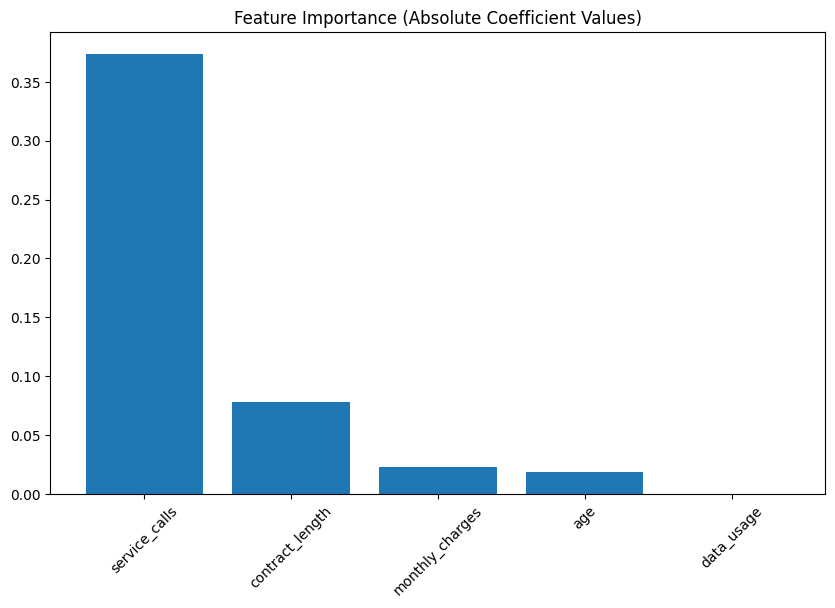

In [ ]:
#d) What features are most predictive of customer churn?

# Calculate and sort feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xticks(rotation=45)
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.show()

e) Common approaches for handling class imbalance include:

<br> Class weights: Assign higher weights to minority class
<br> SMOTE: Create synthetic samples of minority class
<br> Undersampling majority class
<br> Collecting more data for minority class
<br> Using different evaluation metrics (e.g., ROC-AUC, precision-recall curves)